In [1]:
from sympy import *
# init_session()
init_printing()

## Anisotrpic Diffusion, Manufactured solutions and computation of magnetic field angle through streamfunction

Poisson Equation: Substitute
$u_{exact}$ is the exact solution
    $u_{exact} = sin(x)+ cos(y)$ into the Poisson equation, $u_{xx}+u_{yy} =f$,to get
                    \begin{equation}
                    − sin x − cos y = f,
                    \end{equation}
which suggests to define $f = − sin x − cos y.$

Therefore, the Poisson equation, $u_{xx}+u_{yy} =f$ with $f =−sinx−cosy$, has the following exact solution,

\begin{equation}
u = sin x + cos y.
\end{equation}

Only Dirichlet boundary conditions.
Take any function and substitute it into a governing equation you want to solve, and whatever remains is the source term. In this way, you can come up with an exact solution to any equation by introducing a source term. 

Streamfunction computation is in another MATLAB code (Well, now it is easy and is part of the Python/FORTRAN code)


$\psi$ is the Streamfunction
\begin{equation}
\psi = cos(\pi x) cos(\pi y)
\end{equation}


\begin{equation}
B_x = \partial\psi/\partial y  = -\pi cos(\pi x) sin(\pi y) 
\end{equation}


\begin{equation}
B_y = -\partial\psi/\partial x  = \pi sin(\pi x) cos(\pi y).
\end{equation}

In [2]:
from sympy.abc import rho, beta, nu
from sympy.utilities.codegen import codegen
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# import sys
# import mpmath
# sys.modules['sympy.mpmath'] = mpmath
rho, u, c, s = symbols('rho u c s')
gamma,h, theta = symbols('gamma h \theta')

T_e,phi,n_e = symbols('T_{e} \phi n_e')

D_para, D_per, nu_col = symbols('D_para D_perp \eta_{col}')
u_x = symbols(' u_{x}')
deb,mu,B = symbols ('\lambda_{D} \mu B')

x ,y,a,b = symbols('x y a b')


# 1. Simple Test case of Kuzmin JCP 2009
https://www.sciencedirect.com/science/article/pii/S0021999109000552

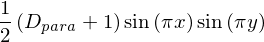

In [3]:
t=sin(pi*x)*sin(pi*y)*(1/(2*pi**2))
D = Matrix ([[D_para,0],
             [0,1]])
tx=diff(t,x)
txx=diff(tx,x)
ty=diff(t,y)
tyy=diff(ty,y)
delT=Matrix ([[tx], [ty]])
DdelT=-D*(delT)
simplify(DdelT)
simple=((diff((DdelT[0]),x))+(diff((DdelT[1]),y)))
simplify(simple)

In [4]:
result = codegen(('my_function', simplify(simple)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(D_para, x, y)
implicit none
REAL*8, intent(in) :: D_para
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = (1.0d0/2.0d0)*(D_para + 1)*sin(3.14159265358979d0*x)*sin( &
      3.14159265358979d0*y)

end function



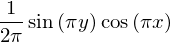

In [5]:
tx

In [6]:
result = codegen(('my_function', simplify(tx)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

REAL*8, parameter :: pi = 3.14159265358979d0
my_function = (1.0d0/2.0d0)*sin(3.14159265358979d0*y)*cos( &
      3.14159265358979d0*x)/pi

end function



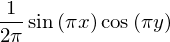

In [7]:
ty


In [8]:
result = codegen(('my_function', simplify(ty)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

REAL*8, parameter :: pi = 3.14159265358979d0
my_function = (1.0d0/2.0d0)*sin(3.14159265358979d0*x)*cos( &
      3.14159265358979d0*y)/pi

end function



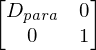

In [9]:
simplify(D)

In [10]:
result = codegen(('my_function', simplify(D)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

subroutine my_function(D_para, out_1654158974128299383)
implicit none
REAL*8, intent(in) :: D_para
REAL*8, intent(out), dimension(1:2, 1:2) :: out_1654158974128299383

out_1654158974128299383(1, 1) = D_para
out_1654158974128299383(2, 1) = 0
out_1654158974128299383(1, 2) = 0
out_1654158974128299383(2, 2) = 1

end subroutine



## 2a. Van Es example -1 JCP 2014 test cases
https://www.sciencedirect.com/science/article/pii/S0021999114003155

# Constant angle of misalignment Example 1

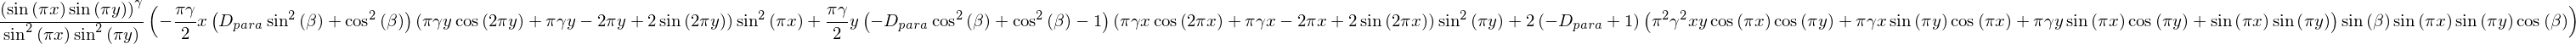

In [11]:
t = x*y*((sin(pi*x)*sin(pi*y)))**gamma

# t = ((sin(pi*x)*cos(pi*y)))**1

U = Matrix ([[D_para,0],
             [0,1]])
R = Matrix ([[cos(beta),sin(beta)],
             [-sin(beta),cos(beta)]])
# R = Matrix ([[np.cos(45*3.14592/180),np.sin(45*3.14592/180)],
#              [-np.sin(45*3.14592/180),np.cos(45*3.14592/180)]])
tx=diff(t,x)
txx=diff(tx,x)
ty=diff(t,y)
tyy=diff(t,y)
D=R**-1*U*R

delT=Matrix ([[tx], [ty]])
DdelT=-D*(delT)
simplify(DdelT)
source=((diff((DdelT[0]),x))+(diff((DdelT[1]),y)))
simplify(source)

In [12]:
result = codegen(('my_function', simplify(source)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(D_para, beta, gamma, x, y)
implicit none
REAL*8, intent(in) :: D_para
REAL*8, intent(in) :: beta
REAL*8, intent(in) :: gamma
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

REAL*8, parameter :: pi = 3.14159265358979d0
my_function = (sin(3.14159265358979d0*x)*sin(3.14159265358979d0*y))** &
      gamma*(-1.0d0/2.0d0*pi*gamma*x*(D_para*sin(beta)**2 + cos(beta)** &
      2)*(pi*gamma*y*cos(6.28318530717959d0*y)

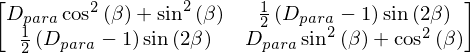

In [13]:
simplify(D)

In [14]:
result = codegen(('my_function', simplify(D)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

subroutine my_function(D_para, beta, out_7743498222860489354)
implicit none
REAL*8, intent(in) :: D_para
REAL*8, intent(in) :: beta
REAL*8, intent(out), dimension(1:2, 1:2) :: out_7743498222860489354

out_7743498222860489354(1, 1) = D_para*cos(beta)**2 + sin(beta)**2
out_7743498222860489354(2, 1) = (1.0d0/2.0d0)*(D_para - 1)*sin(2.0d0* &
      beta)
out_7743498222860489354(1, 2) = (1.0d0/2.0d0)*(D_para - 1)*sin(2.0d0* &
      beta)
out

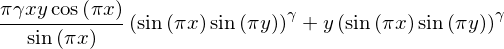

In [15]:
tx

In [16]:
result = codegen(('my_function', simplify(tx)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(gamma, x, y)
implicit none
REAL*8, intent(in) :: gamma
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

REAL*8, parameter :: pi = 3.14159265358979d0
my_function = y*(sin(3.14159265358979d0*x)*sin(3.14159265358979d0*y))** &
      gamma*(pi*gamma*x/tan(3.14159265358979d0*x) + 1)

end function



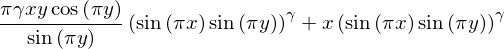

In [17]:
ty

In [18]:
result = codegen(('my_function', simplify(ty)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(gamma, x, y)
implicit none
REAL*8, intent(in) :: gamma
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

REAL*8, parameter :: pi = 3.14159265358979d0
my_function = x*(sin(3.14159265358979d0*x)*sin(3.14159265358979d0*y))** &
      gamma*(pi*gamma*y/tan(3.14159265358979d0*y) + 1)

end function



## 2b. Test case with high temperature gradient
https://www.sciencedirect.com/science/article/pii/S0021999115007810

Example 4.4

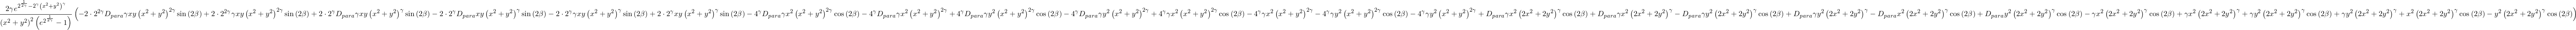

In [19]:
t = (1/(1-exp(-2**(1/(2*gamma)))))*(exp((-2**gamma)*(x**2+y**2)**gamma)-exp(-2**(1/(2*gamma))))

# t = exp((sin(pi*x)*cos(pi*y)))**1

U = Matrix ([[D_para,0],
             [0,1]])
R = Matrix ([[cos(beta),sin(beta)],
             [-sin(beta),cos(beta)]])
# R = Matrix ([[np.cos(45*3.14592/180),np.sin(45*3.14592/180)],
#              [-np.sin(45*3.14592/180),np.cos(45*3.14592/180)]])
tx=diff(t,x)
txx=diff(tx,x)
ty=diff(t,y)
tyy=diff(t,y)
D=R**-1*U*R

delT=Matrix ([[tx], [ty]])
DdelT=-D*(delT)
simplify(DdelT)
source=((diff((DdelT[0]),x))+(diff((DdelT[1]),y)))
simplify(source)

In [20]:
result = codegen(('my_function', simplify(source)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(D_para, beta, gamma, x, y)
implicit none
REAL*8, intent(in) :: D_para
REAL*8, intent(in) :: beta
REAL*8, intent(in) :: gamma
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = 2*gamma*(-2*2**(2*gamma)*D_para*gamma*x*y*(x**2 + y**2)**( &
      2*gamma)*sin(2.0d0*beta) + 2*2**(2*gamma)*gamma*x*y*(x**2 + y**2) &
      **(2*gamma)*sin(2.0d0*beta) + 2*2**gamma*D_para*gamma*x*y*(x**2 + &
      y**2)**g

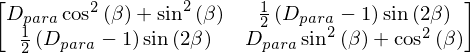

In [21]:
simplify(D)

In [22]:
result = codegen(('my_function', simplify(D)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

subroutine my_function(D_para, beta, out_7743498222860489354)
implicit none
REAL*8, intent(in) :: D_para
REAL*8, intent(in) :: beta
REAL*8, intent(out), dimension(1:2, 1:2) :: out_7743498222860489354

out_7743498222860489354(1, 1) = D_para*cos(beta)**2 + sin(beta)**2
out_7743498222860489354(2, 1) = (1.0d0/2.0d0)*(D_para - 1)*sin(2.0d0* &
      beta)
out_7743498222860489354(1, 2) = (1.0d0/2.0d0)*(D_para - 1)*sin(2.0d0* &
      beta)
out

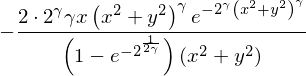

In [23]:
tx

In [24]:
result = codegen(('my_function', simplify(tx)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(gamma, x, y)
implicit none
REAL*8, intent(in) :: gamma
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = -2**(gamma + 1)*gamma*x*(x**2 + y**2)**(gamma - 1)*exp( &
      2.0d0**(0.5d0/gamma) - 2.0d0**gamma*(x**2 + y**2)**gamma)/(exp( &
      2.0d0**(0.5d0/gamma)) - 1)

end function



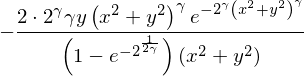

In [25]:
ty

In [26]:
result = codegen(('my_function', simplify(ty)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(gamma, x, y)
implicit none
REAL*8, intent(in) :: gamma
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = -2**(gamma + 1)*gamma*y*(x**2 + y**2)**(gamma - 1)*exp( &
      2.0d0**(0.5d0/gamma) - 2.0d0**gamma*(x**2 + y**2)**gamma)/(exp( &
      2.0d0**(0.5d0/gamma)) - 1)

end function



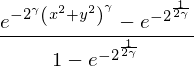

In [27]:
t

In [28]:
result = codegen(('my_function', t), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(gamma, x, y)
implicit none
REAL*8, intent(in) :: gamma
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = (exp(-2.0d0**gamma*(x**2 + y**2)**gamma) - exp(-2.0d0**( &
      0.5d0/gamma)))/(1 - exp(-2.0d0**(0.5d0/gamma)))

end function



# 3a. Nishikawa AIAA 2017
https://arc.aiaa.org/doi/abs/10.2514/6.2017-0310

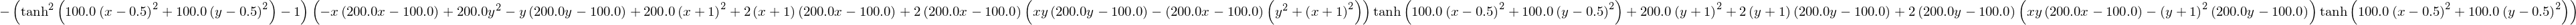

In [29]:
#  t is the exact solution and we have to 'fmms' which is the source term

t = 1-tanh (((x-0.5)**2+(y-0.5)**2)/0.01)

# This is the Diffusion matrix

D = Matrix ([[(x+1)**2+y**2,-x*y],
             [-x*y,(y+1)**2]])
tx=diff(t,x)
txx=diff(tx,x)
ty=diff(t,y)
tyy=diff(ty,y)
delT=Matrix ([[tx], [ty]])

DdelT=-D*(delT)

simplify(DdelT)

# Substitute in the diffusion equation

fmms=simplify(simplify(diff(simplify(DdelT[0]),x))+simplify(diff(simplify(DdelT[1]),y)))
simplify(fmms)

In [30]:
result = codegen(('my_function', simplify(fmms)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = -(tanh(100.0d0*(x - 0.5d0)**2 + 100.0d0*(y - 0.5d0)**2)**2 &
      - 1)*(-x*(200.0d0*x - 100.0d0) + 200.0d0*y**2 - y*(200.0d0*y - &
      100.0d0) + 200.0d0*(x + 1)**2 + 2*(x + 1)*(200.0d0*x - 100.0d0) + &
      2*(200.0d0*x - 100.0d0)*(x*y*(200.0d0*y - 100.0d0) - (200.0d0*x - &
      100.0d0)*(y**2 + (x + 1)**2))*tanh(100.0d0

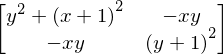

In [31]:
simplify(D)

In [32]:
result = codegen(('my_function', simplify(D)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

subroutine my_function(x, y, out_7502789821249382767)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y
REAL*8, intent(out), dimension(1:2, 1:2) :: out_7502789821249382767

out_7502789821249382767(1, 1) = y**2 + (x + 1)**2
out_7502789821249382767(2, 1) = -x*y
out_7502789821249382767(1, 2) = -x*y
out_7502789821249382767(2, 2) = (y + 1)**2

end subroutine



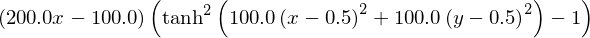

In [33]:
simplify(tx)

In [34]:
result = codegen(('my_function', simplify(tx)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = (200.0d0*x - 100.0d0)*(tanh(100.0d0*(x - 0.5d0)**2 + &
      100.0d0*(y - 0.5d0)**2)**2 - 1)

end function



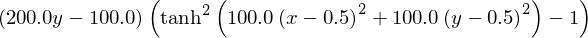

In [35]:
simplify(ty)

In [36]:
result = codegen(('my_function', simplify(ty)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = (200.0d0*y - 100.0d0)*(tanh(100.0d0*(x - 0.5d0)**2 + &
      100.0d0*(y - 0.5d0)**2)**2 - 1)

end function



# 3b. Monotone finite volume schemes for diffusion equations on polygonal meshes Yuan and Sheng
https://www.sciencedirect.com/science/article/pii/S0021999108001587

In [37]:
t = sin(pi*x)*sin(pi*y)

U = Matrix ([[1+2*(x)**2+y**2,0],
             [0,1+(x)**2+2*y**2]])
R = Matrix ([[cos(beta),sin(beta)],
             [-sin(beta),cos(beta)]])
tx=diff(t,x)
txx=diff(tx,x)
ty=diff(t,y)
tyy=diff(ty,y)
D=R**-1*U*R
delT=Matrix ([[tx], [ty]])
DdelT=-D*(delT)
simplify(DdelT)
fmms=simplify(simplify(diff(simplify(DdelT[0]),x))+simplify(diff(simplify(DdelT[1]),y)))

simplify(fmms)

In [38]:
result = codegen(('my_function', simplify(fmms)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(beta, x, y)
implicit none
REAL*8, intent(in) :: beta
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

REAL*8, parameter :: pi = 3.14159265358979d0
my_function = pi*(2*x*(sin(beta)**2 - 2)*sin(3.14159265358979d0*y)*cos( &
      3.14159265358979d0*x) - 2*x*sin(beta)*sin(3.14159265358979d0*x)* &
      cos(beta)*cos(3.14159265358979d0*y) + 2*y*(sin(beta)**2 - 2)*sin( &
      3.14159265358979d0*x)*cos(3.141592653

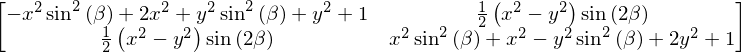

In [39]:
simplify(D)

In [40]:
result = codegen(('my_function', simplify(D)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

subroutine my_function(beta, x, y, out_4818250075572645832)
implicit none
REAL*8, intent(in) :: beta
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y
REAL*8, intent(out), dimension(1:2, 1:2) :: out_4818250075572645832

out_4818250075572645832(1, 1) = -x**2*sin(beta)**2 + 2*x**2 + y**2*sin( &
      beta)**2 + y**2 + 1
out_4818250075572645832(2, 1) = (1.0d0/2.0d0)*(x**2 - y**2)*sin(2.0d0* &
      beta)
out_4818250075572645832(1, 2) = (1.0

In [41]:
simplify(tx)

In [42]:
result = codegen(('my_function', simplify(tx)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

REAL*8, parameter :: pi = 3.14159265358979d0
my_function = pi*sin(3.14159265358979d0*y)*cos(3.14159265358979d0*x)

end function



In [43]:
simplify(ty)

In [44]:
result = codegen(('my_function', simplify(ty)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

REAL*8, parameter :: pi = 3.14159265358979d0
my_function = pi*sin(3.14159265358979d0*x)*cos(3.14159265358979d0*y)

end function



## 4a. Varying angle of misalignment Example 2b Closed field lines
https://www.sciencedirect.com/science/article/pii/

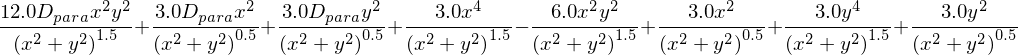

In [45]:
t = 1-((x)**2+(y)**2)**1.5
tx=diff(t,x)
txx=diff(tx,x)
ty=diff(t,y)
tyy=diff(ty,y)
beta = atan(-y/x)
U = Matrix ([[D_para,0],
             [0,1]])
R = Matrix ([[cos(beta),sin(beta)],
             [-sin(beta),cos(beta)]])
D=R**-1*U*R

delT=Matrix ([[tx], [ty]])
DdelT=-D*(delT)
simplify(DdelT)
Source_closed=((diff((DdelT[0]),x))+(diff((DdelT[1]),y)))
simplify(Source_closed)

In [46]:
result = codegen(('my_function', simplify(Source_closed)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(D_para, x, y)
implicit none
REAL*8, intent(in) :: D_para
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = 12.0d0*D_para*x**2*y**2*(x**2 + y**2)**(-1.5d0) + 3.0d0* &
      D_para*x**2*(x**2 + y**2)**(-0.5d0) + 3.0d0*D_para*y**2*(x**2 + y &
      **2)**(-0.5d0) + 3.0d0*x**4*(x**2 + y**2)**(-1.5d0) - 6.0d0*x**2* &
      y**2*(x**2 + y**2)**(-1.5d0) + 3.0d0*x**2*(x**2 + y**2)**(-0.5d0 &
      ) + 3

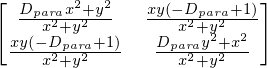

In [47]:
simplify(D)

In [48]:
result = codegen(('my_function', simplify(D)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

subroutine my_function(D_para, x, y, out_5505896859365914830)
implicit none
REAL*8, intent(in) :: D_para
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y
REAL*8, intent(out), dimension(1:2, 1:2) :: out_5505896859365914830

out_5505896859365914830(1, 1) = (D_para*x**2 + y**2)/(x**2 + y**2)
out_5505896859365914830(2, 1) = x*y*(-D_para + 1)/(x**2 + y**2)
out_5505896859365914830(1, 2) = x*y*(-D_para + 1)/(x**2 + y**2)
out_550589685936591483

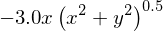

In [49]:
simplify(tx)

In [50]:
result = codegen(('my_function', simplify(tx)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = -3.0d0*x*sqrt(x**2 + y**2)

end function



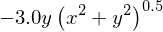

In [51]:
simplify(ty)

In [52]:
result = codegen(('my_function', simplify(ty)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = -3.0d0*y*sqrt(x**2 + y**2)

end function



## 4b .Varying angle of misalignment Example 2b Open field lines
https://www.sciencedirect.com/science/article/pii/

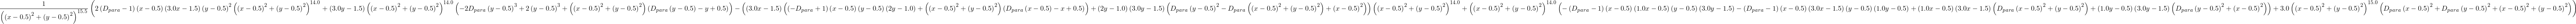

In [53]:
t = 1-((x-0.5)**2+(y-0.5)**2)**1.5
tx=diff(t,x)
txx=diff(tx,x)
ty=diff(t,y)
tyy=diff(ty,y)
beta = atan(-(y-0.5)/(x-0.5))
U = Matrix ([[D_para,0],
             [0,1]])
R = Matrix ([[cos(beta),sin(beta)],
             [-sin(beta),cos(beta)]])
D=R**-1*U*R

delT=Matrix ([[tx], [ty]])
DdelT=-D*(delT)
simplify(DdelT)
Source_open=((diff((DdelT[0]),x))+(diff((DdelT[1]),y)))
simplify(Source_open)

In [54]:
result = codegen(('my_function', simplify(Source_open)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(D_para, x, y)
implicit none
REAL*8, intent(in) :: D_para
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = ((x - 0.5d0)**2 + (y - 0.5d0)**2)**(-15.5d0)*(2*(D_para - &
      1)*(x - 0.5d0)*(3.0d0*x - 1.5d0)*(y - 0.5d0)**2*((x - 0.5d0)**2 + &
      (y - 0.5d0)**2)**14.0d0 + (3.0d0*y - 1.5d0)*((x - 0.5d0)**2 + (y &
      - 0.5d0)**2)**14.0d0*(-2*D_para*(y - 0.5d0)**3 + 2*(y - 0.5d0)**3 &
      + ((

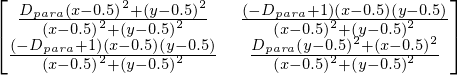

In [55]:
simplify(D)

In [56]:
result = codegen(('my_function',simplify(D)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

subroutine my_function(D_para, x, y, out_7445189485379538126)
implicit none
REAL*8, intent(in) :: D_para
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y
REAL*8, intent(out), dimension(1:2, 1:2) :: out_7445189485379538126

out_7445189485379538126(1, 1) = (D_para*(x - 0.5d0)**2 + (y - 0.5d0)**2) &
      /((x - 0.5d0)**2 + (y - 0.5d0)**2)
out_7445189485379538126(2, 1) = (-D_para + 1)*(x - 0.5d0)*(y - 0.5d0)/(( &
      x - 0.5d0)**2 + (y -

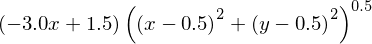

In [57]:
simplify(tx)

In [58]:
result = codegen(('my_function', simplify(tx)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = (-3.0d0*x + 1.5d0)*sqrt((x - 0.5d0)**2 + (y - 0.5d0)**2)

end function



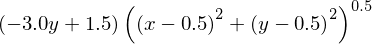

In [59]:
simplify(ty)

In [60]:
result = codegen(('my_function', simplify(ty)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = (-3.0d0*y + 1.5d0)*sqrt((x - 0.5d0)**2 + (y - 0.5d0)**2)

end function



## 4c. Tilted elliptic temperature distributions Example 3a Open field lines
https://www.sciencedirect.com/science/article/pii/

In [61]:
t = 1-(a*x+b*y)*(x**2+y**2)**1.5
tx=diff(t,x)
txx=diff(tx,x)
ty=diff(t,y)
tyy=diff(ty,y)
beta = atan(-ty/tx)
U = Matrix ([[D_para,0],
             [0,1]])
R = Matrix ([[cos(beta),sin(beta)],
             [-sin(beta),cos(beta)]])

D=R**-1*U*R

delT=Matrix ([[tx], [ty]])
DdelT=-D*(delT)
simplify(DdelT)
Source_elliptic_open=((diff((DdelT[0]),x))+(diff((DdelT[1]),y)))
result = codegen(('my_function', simplify(Source_elliptic_open)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(D_para, a, b, x, y)
implicit none
REAL*8, intent(in) :: D_para
REAL*8, intent(in) :: a
REAL*8, intent(in) :: b
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = -(x**2 + y**2)**(-0.5d0)*(-(a*(x**2 + y**2)**1.5d0 + 3.0d0 &
      *x*sqrt(x**2 + y**2)*(a*x + b*y))**3*((D_para - 1)*(b*(x**2 + y** &
      2)**1.5d0 + 3.0d0*y*sqrt(x**2 + y**2)*(a*x + b*y))**2*((a*(x**2 + &
      y**2)**1.5d0 + 3.0d0*x

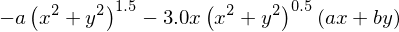

In [62]:
simplify(tx)

In [63]:
result = codegen(('my_function', simplify(tx)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(a, b, x, y)
implicit none
REAL*8, intent(in) :: a
REAL*8, intent(in) :: b
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = -a*(x**2 + y**2)**1.5d0 - 3.0d0*x*sqrt(x**2 + y**2)*(a*x + &
      b*y)

end function



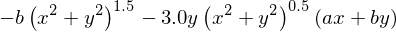

In [64]:
simplify(ty)

In [65]:
result = codegen(('my_function', simplify(ty)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(a, b, x, y)
implicit none
REAL*8, intent(in) :: a
REAL*8, intent(in) :: b
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

my_function = -b*(x**2 + y**2)**1.5d0 - 3.0d0*y*sqrt(x**2 + y**2)*(a*x + &
      b*y)

end function



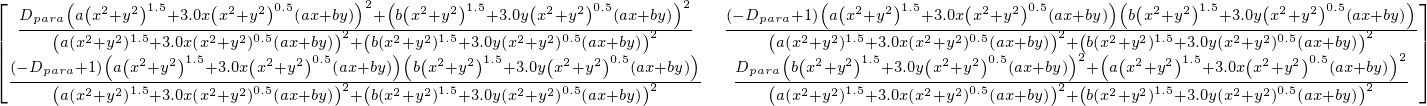

In [66]:
simplify(D)

In [67]:
result = codegen(('my_function', simplify(D)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

subroutine my_function(D_para, a, b, x, y, out_8948775841857299638)
implicit none
REAL*8, intent(in) :: D_para
REAL*8, intent(in) :: a
REAL*8, intent(in) :: b
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y
REAL*8, intent(out), dimension(1:2, 1:2) :: out_8948775841857299638

out_8948775841857299638(1, 1) = (D_para*(a*(x**2 + y**2)**1.5d0 + 3.0d0* &
      x*sqrt(x**2 + y**2)*(a*x + b*y))**2 + (b*(x**2 + y**2)**1.5d0 + &
      3.0d0*y*sq

# 5a .Nonlinear isotropic

In [68]:
t = ((sin(pi*x)*sin(pi*y)))
# t=t

# This is the Diffusion matrix

D = Matrix ([[1+t**2,0],
             [0,1+t**2]])
tx=diff(t,x)
txx=diff(tx,x)
ty=diff(t,y)
tyy=diff(ty,y)
delT=Matrix ([[tx], [ty]])

DdelT=-D*(delT)

simplify(DdelT)

# Substitute in the diffusion equation

fmms=simplify((diff((DdelT[0]),x))+(diff((DdelT[1]),y)))
simplify(fmms)

In [69]:
tx

In [70]:
result = codegen(('my_function', simplify(tx)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

REAL*8, parameter :: pi = 3.14159265358979d0
my_function = pi*sin(3.14159265358979d0*y)*cos(3.14159265358979d0*x)

end function



In [71]:
ty

In [72]:
result = codegen(('my_function', simplify(ty)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

REAL*8, parameter :: pi = 3.14159265358979d0
my_function = pi*sin(3.14159265358979d0*x)*cos(3.14159265358979d0*y)

end function



In [73]:
result = codegen(('my_function', simplify(fmms)), 'f95', 'my_project')
print ( result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function my_function(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

REAL*8, parameter :: pi = 3.14159265358979d0
my_function = 2*pi**2*(3*sin(3.14159265358979d0*x)**2*sin( &
      3.14159265358979d0*y)**2 - sin(3.14159265358979d0*x)**2 - sin( &
      3.14159265358979d0*y)**2 + 1)*sin(3.14159265358979d0*x)*sin( &
      3.14159265358979d0*y)

end function



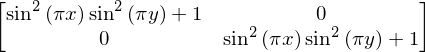

In [74]:
simplify(D)

In [75]:
result = codegen(('my_function', D), 'f95', 'my_project')
print (result[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

subroutine my_function(x, y, out_7370388419947223374)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y
REAL*8, intent(out), dimension(1:2, 1:2) :: out_7370388419947223374

out_7370388419947223374(1, 1) = sin(3.14159265358979d0*x)**2*sin( &
      3.14159265358979d0*y)**2 + 1
out_7370388419947223374(2, 1) = 0
out_7370388419947223374(1, 2) = 0
out_7370388419947223374(2, 2) = sin(3.14159265358979d0*x)**2*sin( &
      3.1415926